In [1]:
# preproccessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
data = pd.read_csv('pima-indians-diabetes.csv')
data.shape

(768, 9)

In [4]:
# get rid of the rows with a glucose value of 0 and below

data = data[data['Glucose'] > 0]

In [5]:
# drop outliers in box plot

out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
            
iqr_outliers(data['Pregnancies'])
iqr_outliers(data['Age'])
data.drop(out, inplace = True)
print("Outliers:", out)

Outliers: [15, 17, 14, 14, 69, 67, 72, 81, 67, 67, 70, 68, 69]


In [6]:
y = data['Outcome']
X = data.drop(['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Outcome'], axis = 1)

In [7]:
X.min()

Pregnancies     0
Glucose        44
Age            21
dtype: int64

In [8]:
X.shape

(754, 3)

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=1/3)

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [11]:
# data visualization

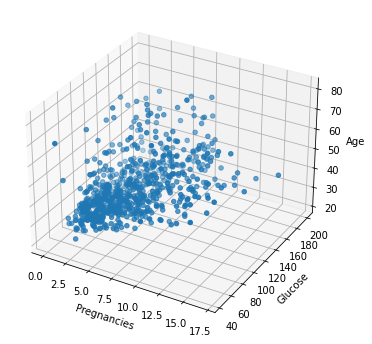

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Pregnancies'], data['Glucose'], data['Age'])
ax.set_xlabel('Pregnancies')
ax.set_ylabel('Glucose')
ax.set_zlabel('Age')

plt.show()

In [13]:
# linear regression

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.25819285085086074

In [15]:
# knn

In [16]:
k_range = range(1, 31)
knn_param_grid = dict(n_neighbors=k_range, weights=['uniform', 'distance'])

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [18]:
print(grid_knn.best_score_)
print(grid_knn.best_params_)

0.7652803532008831
{'n_neighbors': 26, 'weights': 'uniform'}


In [19]:
y_predict = grid_knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.6309523809523809


In [20]:
# logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.7301587301587301

In [22]:
y_predict = log_reg.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.7301587301587301


In [23]:
# random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 500, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 3, 4]

# Method of selecting samples for training each tree
bootstrap = [True]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [26]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 2, verbose=2, n_jobs = -1)

In [27]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 73, 126, 180, 233,
                                                         286, 340, 393, 446,
                                                         500]},
                   verbose=2)

In [28]:
rf_RandomGrid.best_params_

{'n_estimators': 126,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [29]:
print('Train Accuracy: {}'.format(rf_RandomGrid.score(X_train,y_train)))
print('Test Accuracy: {}'.format(rf_RandomGrid.score(X_test,y_test)))

Train Accuracy: 0.8645418326693227
Test Accuracy: 0.75


In [30]:
y_predict = rf_RandomGrid.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.75


In [31]:
# decision trees

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [33]:
dtc.fit(X_train, y_train)
y_predict = dtc.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.6309523809523809


In [34]:
param_grid_dt = {
    'criterion':['gini','entropy'],
    'max_depth':[None, 1, 2, 3, 4,5,6,7,8],
#     'min_samples_split': [1],
}

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [35]:
dtc_RandomGrid = GridSearchCV(estimator = dtc, param_grid = param_grid_dt, cv = 2, verbose=2, n_jobs = -1)
dtc_RandomGrid.fit(X_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8]},
             verbose=2)

In [36]:
dtc_RandomGrid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [37]:
print('Train Accuracy: {}'.format(dtc_RandomGrid.score(X_train,y_train)))
print('Test Accuracy: {}'.format(dtc_RandomGrid.score(X_test,y_test)))

Train Accuracy: 0.7709163346613546
Test Accuracy: 0.7103174603174603


In [38]:
clf_model = DecisionTreeClassifier(criterion="gini",max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [39]:
print('Train Accuracy: {}'.format(clf_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(clf_model.score(X_test,y_test)))

Train Accuracy: 0.7848605577689243
Test Accuracy: 0.7063492063492064


In [40]:
y_predict = clf_model.predict(X_test)

In [41]:
print(metrics.accuracy_score(y_test, y_predict))

0.7063492063492064


In [42]:
# svm

In [43]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [44]:
print('Train Accuracy: {}'.format(clf.score(X_train,y_train)))
print('Test Accuracy: {}'.format(clf.score(X_test,y_test)))

Train Accuracy: 0.7768924302788844
Test Accuracy: 0.7341269841269841


In [45]:
y_predict = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.7341269841269841


In [46]:
# svm polynomial

In [47]:
param_grid_poly = {
    'C': [1, 3, 10],
    'degree': [3],
    'gamma': [0.1, 0.15, 0.2],
    'kernel': ['poly'],
}

In [48]:
from sklearn.model_selection import GridSearchCV

poly_grid = GridSearchCV(estimator = clf, param_grid = param_grid_poly, cv=5, verbose=2, n_jobs = -1)

In [49]:
poly_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 3, 10], 'degree': [3],
                         'gamma': [0.1, 0.15, 0.2], 'kernel': ['poly']},
             verbose=2)

In [50]:
poly_grid.best_params_

{'C': 3, 'degree': 3, 'gamma': 0.2, 'kernel': 'poly'}

In [51]:
print('Train Accuracy: {}'.format(poly_grid.score(X_train,y_train)))
print('Test Accuracy: {}'.format(poly_grid.score(X_test,y_test)))

Train Accuracy: 0.7549800796812749
Test Accuracy: 0.7103174603174603


In [52]:
y_predict = poly_grid.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.7103174603174603


In [53]:
# svc rbf

In [54]:
param_grid_rbf = {
    'C': [1, 3, 10],
    'gamma': [0.1, 0.15, 0.2],
}

In [55]:
rbf_grid = GridSearchCV(estimator = clf, param_grid = param_grid_rbf, cv=5, verbose=2, n_jobs = -1)

In [56]:
rbf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 3, 10], 'gamma': [0.1, 0.15, 0.2]},
             verbose=2)

In [57]:
rbf_grid.best_params_

{'C': 1, 'gamma': 0.1}

In [58]:
print('Train Accuracy: {}'.format(rbf_grid.score(X_train,y_train)))
print('Test Accuracy: {}'.format(rbf_grid.score(X_test,y_test)))

Train Accuracy: 0.7729083665338645
Test Accuracy: 0.7380952380952381


In [59]:
y_predict = rbf_grid.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.7380952380952381


In [60]:
# sigmoid kernel

In [61]:
param_grid_sigmoid = {
    'C': [0.2],
    'degree': [3],
    'gamma': [0.1, 0.15, 0.2],
    'kernel': ['sigmoid'],
}

In [62]:
sigmoid_grid = GridSearchCV(estimator = clf, param_grid = param_grid_sigmoid, cv=5, verbose=2, n_jobs = -1)

In [63]:
sigmoid_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.2], 'degree': [3], 'gamma': [0.1, 0.15, 0.2],
                         'kernel': ['sigmoid']},
             verbose=2)

In [64]:
sigmoid_grid.best_params_

{'C': 0.2, 'degree': 3, 'gamma': 0.1, 'kernel': 'sigmoid'}

In [65]:
print('Train Accuracy: {}'.format(sigmoid_grid.score(X_train,y_train)))
print('Test Accuracy: {}'.format(sigmoid_grid.score(X_test,y_test)))

Train Accuracy: 0.7729083665338645
Test Accuracy: 0.7261904761904762


In [66]:
y_predict = sigmoid_grid.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.7261904761904762


In [67]:
# linear svc

In [68]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)

LinearSVC()

In [69]:
print('Train Accuracy: {}'.format(lin_clf.score(X_train,y_train)))
print('Test Accuracy: {}'.format(lin_clf.score(X_test,y_test)))

Train Accuracy: 0.7569721115537849
Test Accuracy: 0.7301587301587301


In [70]:
y_predict = lin_clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.7301587301587301


In [71]:
# naive bayes gaussian

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [74]:
print('Train Accuracy: {}'.format(gnb.score(X_train,y_train)))
print('Test Accuracy: {}'.format(gnb.score(X_test,y_test)))

Train Accuracy: 0.750996015936255
Test Accuracy: 0.7341269841269841


In [75]:
y_predict = gnb.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.7341269841269841
